## Tech companies and policymakers across the globe need tools to detect "fake" (deliberately misleading) news (a.k.a. propaganda).  Machine learning offers a solution with ~90% accuracy - a good start at least for text-based forms of news.

### Looking at the large Kaggle dataset that we focused on, it's clear that human screening is not as accurate



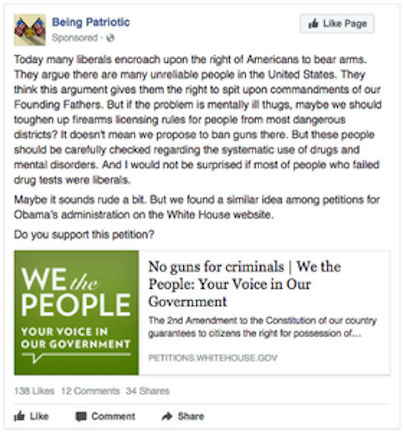

In [1]:
from IPython.display import Image
Image("fake_ad_example.png")

## Sentiment scores provide convenient summary statistics for snippets of text, so we hoped that they could be used to perform a multiple logistic regression to classify news articles

### However, their distributions were nearly identical for real and fake news articles, so the accuracy of such a model was not much better than flipping a coin

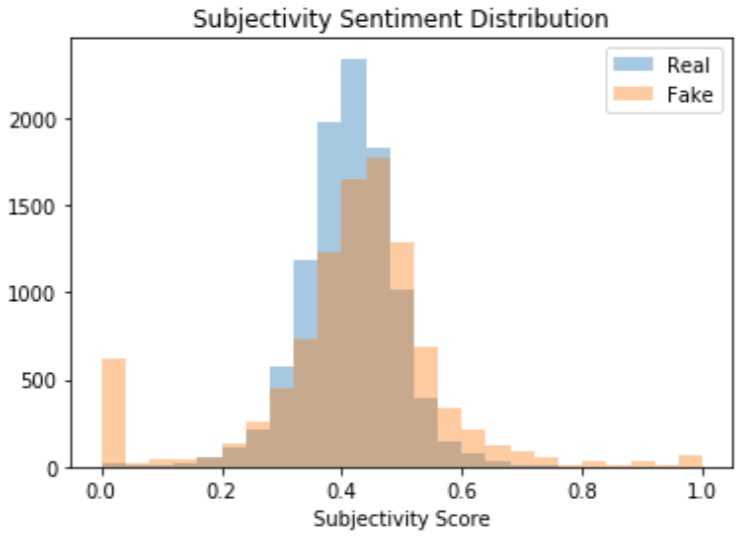

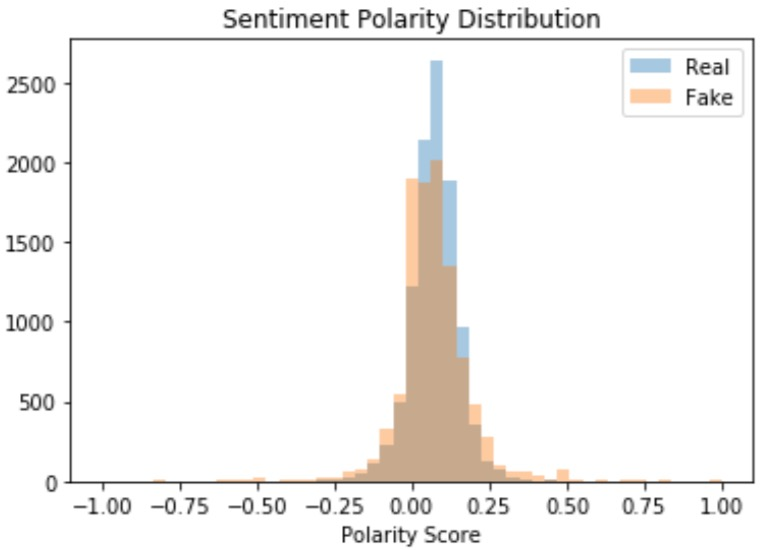

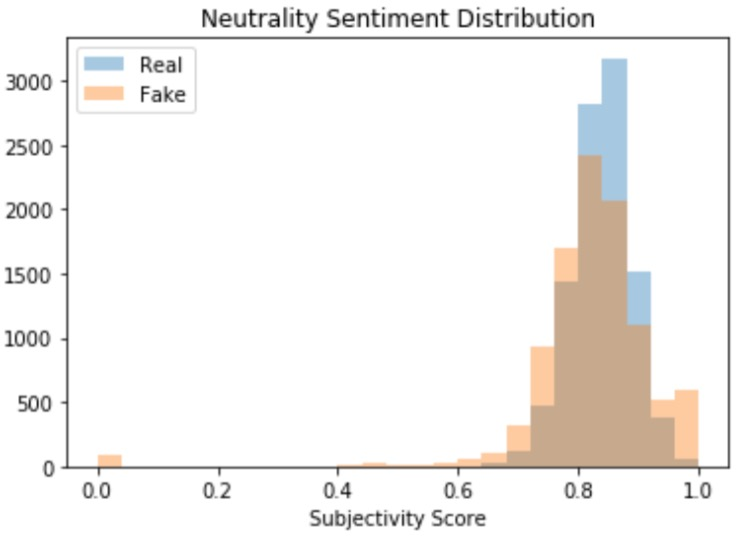

In [3]:
display(Image("Subjectivity_Distribution.jpg"))
display(Image("Sentiment_Polarity_Distribution.jpg"))
Image("Neutral_Distribution.jpg")

## From there, we turned to NLP, which maps words to numeric features that can be fed into statistical methods, the output of which can be used for classification ("real" vs. "fake"). 

### This leads to a much higher number of independent variables (predictors)

In [4]:
%store -r example_article 
example_article

'US Drone Pilots May Be ‘Illegally’ Acquiring Targets From UK Bases   Source: Motherboard \n\nCreech Air Force Base , Nevada, is widely known to be the heart of the United States’ overseas drone operations, from where more than 100 drone flights per day —mostly in the Middle East—are controlled. Notions of this base’s overworked drone pilots, sitting in stuffy trailers monitoring and killing targets 8,000 miles away, have been popularized by movies such as Good Kill and Eye in the Sky. \nBut a British human rights campaign group says it has uncovered documents that show the US is also conducting its military drone operations from within Royal Air Force (RAF) bases in the UK, an act that would be deemed in breach of international laws , argues the group. The British government denies this however, stating , “the US does not operate RPAS [remotely piloted aircraft systems] from the UK.” \nPublicly available job listings and résumés, shown to Motherboard by human rights campaign group Rep

In [5]:
%store -r ex
ex

,100,act,air,answer,attorney,available,away,based,british,campaign,...,source,staff,state,states,united,united states,video,war,work,working
0,1,1,2,2,1,1,1,2,6,2,...,1,1,1,1,1,1,1,1,1,1


In [6]:
%store -r model
%store -r dfex
if model.predict(dfex)[0] == 0:
    print("Probably real")
else:
    print("Probably fake")

Probably fake


## To enhance accuracy, we also included our initial sentiment indicators as features, as well as some aggregegate features (e.g. number of capital letters in the article, number of exclamation points). 

chart: reduced-dimension scatter plot

In [7]:
%store -r df_train_lr
df_train_lr.head()

,0,000,1,10,100,11,12,13,15,17,...,york,york times,young,youre,compounds,negs,neus,poss,pol,subj
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.9939,0.158,0.766,0.076,-0.050606,0.331803
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8849,0.043,0.884,0.073,0.218643,0.486216
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,-0.8360,0.053,0.935,0.012,0.077674,0.305392
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,-0.7928,0.096,0.851,0.054,0.009783,0.513043
4,0,0,1,0,0,0,0,0,0,0,...,4,4,0,0,0.9856,0.078,0.824,0.098,0.066756,0.363961


In [8]:
%store -r table2
table2

,"informative for ""real""","coefficient for ""real""","informative for ""fake""","coefficient for ""fake"""
0,000,-10.993878,avg_word_length,-3.350543
1,breitbart news,-10.013048,num_nums,-3.567130
2,mr obama,-10.013048,clinton,-4.614886
3,said mr,-10.013048,trump,-4.644156
4,mr trumps,-9.895265,people,-4.645905
5,com,-9.384440,said,-4.953623
6,games,-9.148051,like,-4.999916
7,pence,-9.148051,hillary,-5.018373
8,president trump,-9.148051,just,-5.061632
9,castro,-9.096758,new,-5.063402


In [17]:
%store -r table1
table1

,"informative for ""real""","coefficient for ""real""","informative for ""fake""","coefficient for ""fake"""
0,000,-1.775681,october,1.464918
1,breitbart,-1.543640,november,1.117678
2,follow,-1.522940,0,1.035245
3,twitter,-1.514925,share,1.005953
4,com,-1.192881,hillary,0.998986
5,sunday,-0.990900,major,0.976374
6,games,-0.948990,2016,0.896866
7,ms,-0.941412,image,0.799001
8,breitbart news,-0.909656,started,0.796570
9,votes,-0.798642,september,0.734943


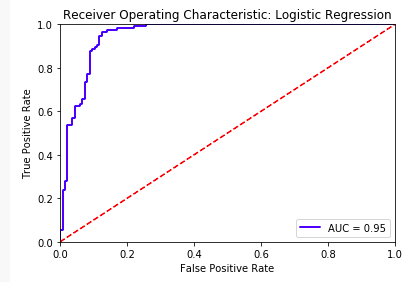

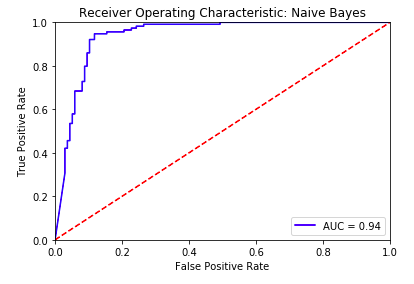

In [2]:
from IPython.display import Image
display(Image("ROC_LR.png"))
Image("ROC_NB.png")

## We chose two simple but effective techniques - naive Bayes and logistic regression - to perform machine learning

In [9]:
from textblob import TextBlob
import re
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, WhitespaceTokenizer, TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
np.random.seed(180)

In [10]:
%store -r xtrain
%store -r xtest
%store -r ytrain
%store -r ytest

In [11]:
def clean_article(article):
    art = re.sub("[^A-Za-z0-9' ]", '', article)
    art2 = re.sub("[( ' )( ')(' )]", ' ', art)
    art3 = re.sub('\s[A-Za-z]\s', ' ', art2)
    return art3.lower()

In [12]:
bow = CountVectorizer(stop_words = 'english', preprocessor = clean_article, tokenizer = TweetTokenizer().tokenize,
                      ngram_range=(1,2), max_features = 1000, max_df = 1.0, min_df = 1, binary = False)
training_data = bow.fit_transform(xtrain.text)
test_data = bow.transform(xtest.text)

In [13]:
dftrain = pd.DataFrame(training_data.toarray())
dftrain.columns = bow.get_feature_names()
dftest = pd.DataFrame(test_data.toarray())
dftest.columns = bow.get_feature_names()

In [14]:
df_train_lr = pd.DataFrame.copy(dftrain)
df_train_lr['compounds'] = xtrain['compounds'].values
df_train_lr['negs'] = xtrain['negs'].values
df_train_lr['neus'] = xtrain['neus'].values
df_train_lr['poss'] = xtrain['poss'].values
df_train_lr['pol'] = xtrain['pol'].values
df_train_lr['subj'] = xtrain['subj'].values

df_test_lr = pd.DataFrame.copy(dftest)
df_test_lr['compounds'] = xtest['compounds'].values
df_test_lr['negs'] = xtest['negs'].values
df_test_lr['neus'] = xtest['neus'].values
df_test_lr['poss'] = xtest['poss'].values
df_test_lr['pol'] = xtest['pol'].values
df_test_lr['subj'] = xtest['subj'].values

In [15]:
lr2 = LogisticRegression()
model = lr2.fit(df_train_lr, ytrain)
lr2preds = model.predict(df_test_lr)
accuracy = accuracy_score(ytest, lr2preds)
print('accuracy:', accuracy)


accuracy: 0.9253333333333333


In [16]:
clean_article(example_article)

'us drone pilots may be illegally acquiring targets from uk bases   source motherboard creech air force base  nevada is widely known to be the heart of the united states overseas drone operations from where more than 100 drone flights per day mostly in the middle eastare controlled notions of this bases overworked drone pilots sitting in stuffy trailers monitoring and killing targets 8000 miles away have been popularized by movies such as good kill and eye in the sky but british human rights campaign group says it has uncovered documents that show the us is also conducting its military drone operations from within royal air force raf bases in the uk an act that would be deemed in breach of international laws  argues the group the british government denies this however stating  the us does not operate rpas remotely piloted aircraft systems from the uk publicly available job listings and rsums shown to motherboard by human rights campaign group reprieve show that us military personnel ba